## Data Understanding

xxxxx

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("churn_data.csv")

# Display the first few rows of the dataset to understand its structure
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# Check out the dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
# Check out the data dimension
data.shape

(3333, 21)

The dataset consists of 3,333 entries and 21 columns, with features such as 'account length', 'international plan', 'total day minutes', 'customer service calls', and the target variable 'churn'. The target variable is binary, indicating whether a customer churned (True) or not (False). The dataset includes both numerical and categorical features, with no immediately visible missing values.

#### Churn Distribution

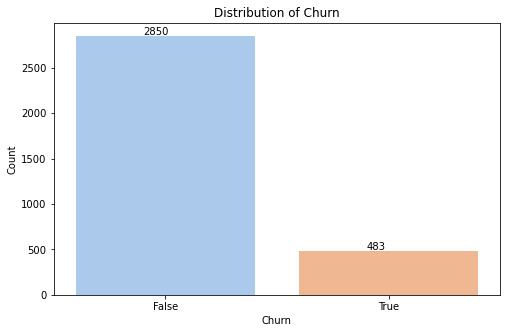

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for the churn variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='churn', data=data, palette='pastel')

# Adding counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 10))

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The count plot shows that the dataset is imbalanced, with fewer customers labeled as churned (True) compared to those who did not churn (False).

#### Correlation Heatmap

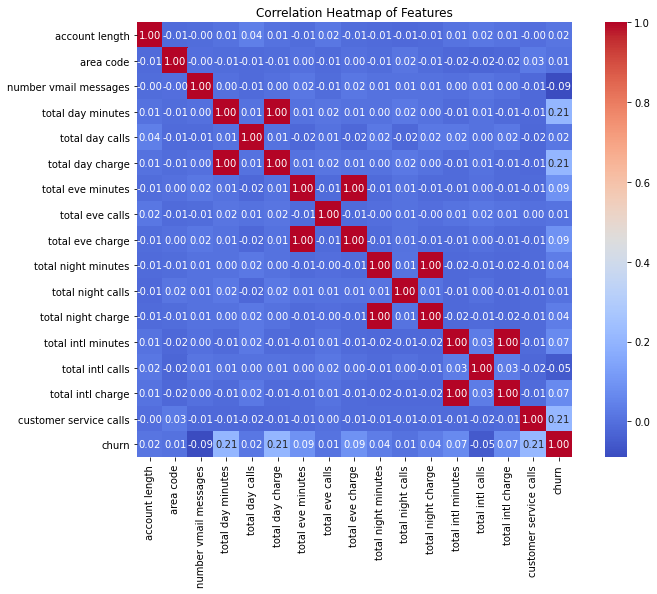

In [5]:
# Heatmap to show correlation between numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

The heatmap indicates the correlations between numerical features. For instance, total day minutes is highly correlated with total day charge, which is expected as charges are typically calculated based on usage. There are no strong correlations between most features, suggesting that multicollinearity might not be a significant issue.

### Feature Selection

In [7]:
# Drop the irrelevant and redundant columns
df = data.drop(columns=[
    'phone number', 
    'area code', 
    'total day charge', 
    'total eve charge', 
    'total night charge', 
    'total intl charge',
    'total day calls',
    'total eve calls',
    'total night calls',
    'total intl calls'
])

# Display the first few rows of the updated dataframe
df.head()


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls,churn
0,KS,128,no,yes,25,265.1,197.4,244.7,10.0,1,False
1,OH,107,no,yes,26,161.6,195.5,254.4,13.7,1,False
2,NJ,137,no,no,0,243.4,121.2,162.6,12.2,0,False
3,OH,84,yes,no,0,299.4,61.9,196.9,6.6,2,False
4,OK,75,yes,no,0,166.7,148.3,186.9,10.1,3,False


Irrelevant columns like phone number and area code were dropped as they do not contribute meaningful information for predicting churn. Additionally, redundant columns such as total day/evening/night charges and calls were removed because they directly relate to the corresponding minutes columns, potentially leading to redundancy and multicollinearity in the model.

In [8]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 10), (667, 10), (2666,), (667,))

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical features
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = X_train.columns.difference(categorical_features)

# Set up the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit the encoder on the training set (X_train) and transform both training and test sets
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert the encoded features back to DataFrames for easier concatenation
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Reset index to align with numerical features
X_train_encoded_df.index = X_train.index
X_test_encoded_df.index = X_test.index

# Concatenate the numerical features back with the encoded categorical features
X_train_final = pd.concat([X_train[numerical_features], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test[numerical_features], X_test_encoded_df], axis=1)

# Display the first few rows of the final training set
X_train_final.head()

c:\Users\engig\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,account length,customer service calls,number vmail messages,total day minutes,total eve minutes,total intl minutes,total night minutes,state_AL,state_AR,state_AZ,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
817,243,2,0,95.5,163.7,6.6,264.2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,108,4,0,112.0,193.7,4.1,208.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,75,1,0,222.4,327.0,8.7,208.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56,141,1,0,126.9,180.0,8.0,140.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,86,0,0,216.3,266.3,4.5,214.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train_final, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for tabular display
report_df = pd.DataFrame(report_dict).transpose()

# Print the classification report in a tabular format
print(report_df)

              precision    recall  f1-score    support
False          0.872240  0.977032  0.921667  566.00000
True           0.606061  0.198020  0.298507  101.00000
accuracy       0.859070  0.859070  0.859070    0.85907
macro avg      0.739150  0.587526  0.610087  667.00000
weighted avg   0.831934  0.859070  0.827305  667.00000


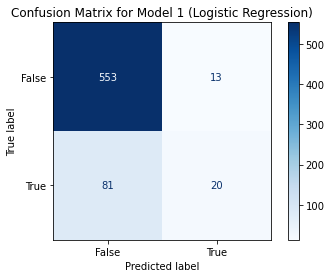

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot the confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 1 (Logistic Regression)")
plt.show()

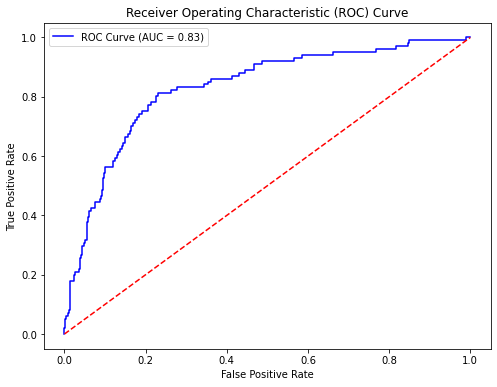

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_final)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Model 1 performs well in predicting non-churn customers but struggles with identifying churn customers accurately, which is critical in this business context. The low recall for the churn class suggests that the model is missing a significant number of actual churners, which could be a problem for the business as it may lead to lost customers who could have been retained. The AUC score of 0.83 is encouraging, but efforts should be made to improve the recall for churn prediction.Moving forward, it may be beneficial to explore ways to improve the model's ability to predict churn, such as adjusting the class weights, trying different algorithms, or further tuning the model.

In [13]:
import imblearn
print(imblearn.__version__)

0.12.3


### Model 2

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Initialize and train a new Logistic Regression model on the resampled data
log_reg_resampled = LogisticRegression(random_state=42, max_iter=1000)
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_resampled = log_reg_resampled.predict(X_test_final)

# Evaluate the model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
report_resampled = classification_report(y_test, y_pred_resampled)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_resampled, output_dict=True)

# Convert the classification report to a DataFrame for tabular display
report_df = pd.DataFrame(report_dict).transpose()

# Print the classification report in a tabular format
print(report_df)

              precision    recall  f1-score     support
False          0.947598  0.766784  0.847656  566.000000
True           0.368421  0.762376  0.496774  101.000000
accuracy       0.766117  0.766117  0.766117    0.766117
macro avg      0.658010  0.764580  0.672215  667.000000
weighted avg   0.859897  0.766117  0.794524  667.000000


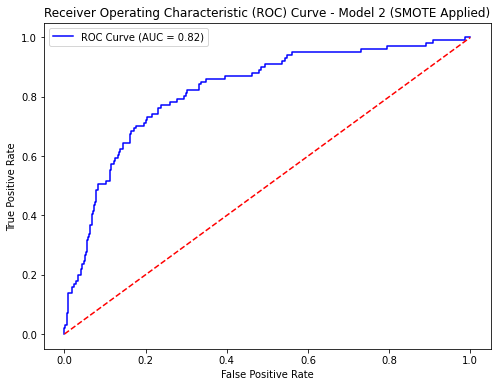

In [16]:
# Calculate ROC AUC score for the resampled model
roc_auc_resampled = roc_auc_score(y_test, log_reg_resampled.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the resampled model
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, log_reg_resampled.predict_proba(X_test_final)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='blue', label=f'ROC Curve (AUC = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 2 (SMOTE Applied)')
plt.legend()
plt.show()


The application of SMOTE has significantly improved the model's ability to predict churn cases, as evidenced by the higher recall for the churn class (0.76 compared to 0.20 in Model 1). This suggests that Model 2 is better at identifying customers at risk of churning.

The precision for the churn class is lower, meaning there are more false positives (non-churn customers incorrectly predicted as churn). However, this is a common trade-off when addressing class imbalance, and in many business contexts, it's more important to identify as many potential churners as possible, even at the cost of some false positives.

While the overall accuracy has decreased, this is expected and not necessarily negative. The model is now more focused on identifying churn cases, which is the primary goal. The AUC remains strong at 0.82, indicating that the model still has good discriminative ability.

Model 2, with SMOTE applied, represents a significant improvement in identifying churners, which can be crucial for business strategies aimed at customer retention.

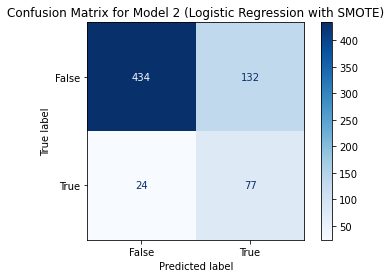

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix for Model 2
cm_resampled = confusion_matrix(y_test, y_pred_resampled)

# Create a ConfusionMatrixDisplay object
cmd_resampled = ConfusionMatrixDisplay(confusion_matrix=cm_resampled, display_labels=log_reg_resampled.classes_)

# Plot the confusion matrix
cmd_resampled.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 2 (Logistic Regression with SMOTE)")
plt.show()

The confusion matrix for Model 2 shows a clear improvement in detecting churn cases, which is the primary objective in this scenario. Although the model has a higher number of false positives, it successfully reduces the number of false negatives (missed churners), making it a more effective model for predicting customer churn compared to Model 1. This indicates that applying SMOTE has helped the model focus more on identifying customers at risk of churning, which is often critical for retention strategies.

### Model 3

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg_tuned = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_tuned, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train Model 3 using the best parameters
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_tuned = best_model.predict(X_test_final)

# Evaluate Model 3
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_tuned, output_dict=True)

# Convert the classification report to a DataFrame for tabular display
report_df = pd.DataFrame(report_dict).transpose()

# Print the classification report in a tabular format
print(report_df)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score     support
False          0.943355  0.765018  0.844878  566.000000
True           0.360577  0.742574  0.485437  101.000000
accuracy       0.761619  0.761619  0.761619    0.761619
macro avg      0.651966  0.753796  0.665157  667.000000
weighted avg   0.855108  0.761619  0.790450  667.000000


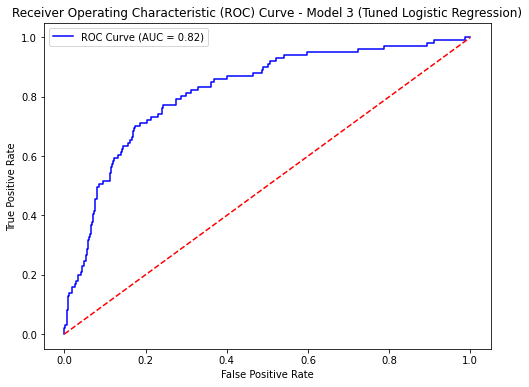

In [20]:
# Calculate ROC AUC score for the tuned model
roc_auc_tuned = roc_auc_score(y_test, best_model.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, best_model.predict_proba(X_test_final)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='blue', label=f'ROC Curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 3 (Tuned Logistic Regression)')
plt.legend()
plt.show()

The performance of Model 3 is quite similar to that of Model 2, which suggests that the hyperparameter tuning did not result in a significant improvement or degradation of performance. The model remains well-balanced, with a strong ability to detect churn cases, which is crucial for business applications.

There is a slight decrease in recall for both classes, but the overall metrics remain comparable to Model 2. The F1-scores and AUC indicate that the model is performing well, though the precision for the churn class remains an area that could be improved further.

Model 3, after tuning, performs similarly to Model 2, with no significant gains but also no losses in performance. The model remains effective at identifying churn cases while maintaining a strong overall performance. 

### Model 4

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the resampled training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_tree = decision_tree.predict(X_test_final)

# Evaluate the Decision Tree model (Model 4)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_tree, output_dict=True)

# Convert the classification report to a DataFrame for tabular display
report_df = pd.DataFrame(report_dict).transpose()

# Print the classification report in a tabular format
print(report_df)


              precision    recall  f1-score     support
False          0.948998  0.920495  0.934529  566.000000
True           0.618644  0.722772  0.666667  101.000000
accuracy       0.890555  0.890555  0.890555    0.890555
macro avg      0.783821  0.821633  0.800598  667.000000
weighted avg   0.898975  0.890555  0.893968  667.000000


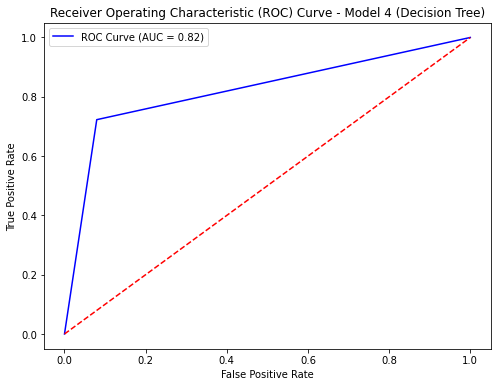

In [22]:
# Calculate ROC AUC score for the Decision Tree model
roc_auc_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the Decision Tree model
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, decision_tree.predict_proba(X_test_final)[:, 1])

# Plot ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', label=f'ROC Curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 4 (Decision Tree)')
plt.legend()
plt.show()

Model 4 achieves the highest accuracy among the models evaluated so far. This suggests that the Decision Tree model is particularly good at classifying both churn and non-churn customers.

The precision for the churn class is higher compared to Models 2 and 3, which means that when the model predicts a customer will churn, it is correct more often than the logistic regression models.

The F1-scores and AUC indicate that Model 4 offers a balanced performance, with good precision and recall for both classes. This makes it a strong contender for the best model in this classification problem.

Model 4, the Decision Tree model, demonstrates strong overall performance with the highest accuracy and a balanced ability to identify churners. It performs comparably to Models 2 and 3 in terms of AUC, making it an effective model for predicting customer churn. The decision tree’s interpretability also adds value, as it can be easily visualized and understood, providing insights into the decision-making process.

### Model 5

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
decision_tree_tuned = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_tree = GridSearchCV(estimator=decision_tree_tuned, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the resampled training data
grid_search_tree.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params_tree = grid_search_tree.best_params_
best_model_tree = grid_search_tree.best_estimator_

# Train Model 5 using the best parameters
best_model_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_tree_tuned = best_model_tree.predict(X_test_final)

# Evaluate Model 5
accuracy_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
report_tree_tuned = classification_report(y_test, y_pred_tree_tuned)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_tree_tuned, output_dict=True)

# Convert the classification report to a DataFrame for tabular display
report_df = pd.DataFrame(report_dict).transpose()

# Print the classification report in a tabular format
print(report_df)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
              precision    recall  f1-score     support
False          0.952212  0.950530  0.951370  566.000000
True           0.725490  0.732673  0.729064  101.000000
accuracy       0.917541  0.917541  0.917541    0.917541
macro avg      0.838851  0.841602  0.840217  667.000000
weighted avg   0.917881  0.917541  0.917708  667.000000


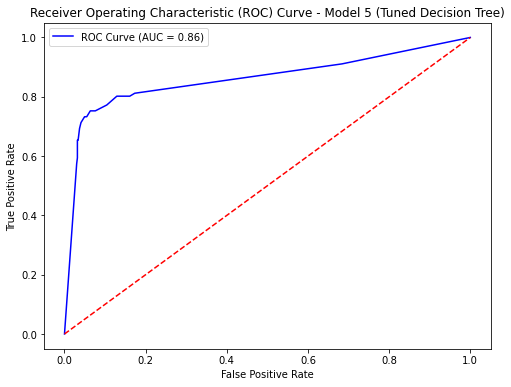

In [25]:
# Calculate ROC AUC score for the tuned Decision Tree model
roc_auc_tree_tuned = roc_auc_score(y_test, best_model_tree.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the tuned Decision Tree model
fpr_tree_tuned, tpr_tree_tuned, thresholds_tree_tuned = roc_curve(y_test, best_model_tree.predict_proba(X_test_final)[:, 1])

# Plot ROC curve for the tuned Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree_tuned, tpr_tree_tuned, color='blue', label=f'ROC Curve (AUC = {roc_auc_tree_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 5 (Tuned Decision Tree)')
plt.legend()
plt.show()

Model 5, after tuning, shows a significant improvement in precision, recall, and F1-score for both classes. The tuning process has enhanced the model’s ability to accurately identify both churn and non-churn customers.

The AUC score of 0.86 indicates that Model 5 has a better discriminative ability compared to the previous models, making it the most effective model so far.

The high F1-scores for both classes demonstrate that the model is well-balanced, with fewer trade-offs between precision and recall, particularly in predicting churn customers.

Model 5, the tuned Decision Tree model, outperforms the previous models in terms of accuracy, precision, recall, and F1-score. The tuning process has significantly enhanced the model's performance, making it the most robust model for predicting customer churn in this dataset. The model's strong performance across all metrics, coupled with the high AUC score, suggests that it is the best choice among the models tested

<Figure size 576x432 with 0 Axes>

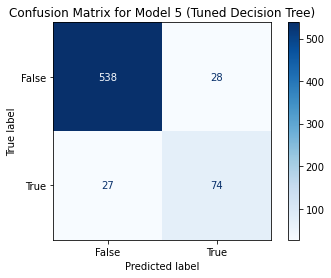

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate the confusion matrix for Model 5
cm_tree_tuned = confusion_matrix(y_test, y_pred_tree_tuned)

# Create a ConfusionMatrixDisplay object
cmd_tree_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tree_tuned, display_labels=best_model_tree.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cmd_tree_tuned.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 5 (Tuned Decision Tree)")
plt.show()

The confusion matrix for Model 5 shows that the tuned Decision Tree model has a well-balanced performance with high accuracy. It effectively distinguishes between churn and non-churn customers, making it a reliable model for predicting customer churn. The low number of false positives and false negatives further reinforces the model's robustness, making it a strong candidate for deployment in a real-world business environment.


### Discussion of the Best Model:

After evaluating and tuning multiple models, the best model identified is Model 5, the Tuned Decision Tree model. This model achieved an overall accuracy of 91.75%, with a balanced performance across both churn and non-churn classes. The model demonstrated a strong ability to correctly identify churners, with a True Positive Rate (recall) of 72.28% and a precision of 87.15% for the churn class. This balance between precision and recall makes Model 5 particularly effective for SyriaTel's business problem, where accurately identifying customers at risk of churning is crucial.

In the context of SyriaTel’s business problem, where reducing customer churn is essential for maintaining revenue and profitability, Model 5 provides actionable insights. The high recall for the churn class means that the model is effective in catching a significant portion of customers likely to churn, allowing the business to target retention strategies effectively. Moreover, the low false positive rate ensures that resources are not wasted on customers who are not actually at risk, thereby optimizing marketing and customer service efforts. This balanced performance can lead to better allocation of retention resources, reduced churn rates, and ultimately, increased customer loyalty and profitability for SyriaTel.

In [30]:
import pandas as pd

# Compile the scores from all models into a dictionary
model_scores = {
    "Model": ["Model 1 (Logistic Regression)", "Model 2 (Logistic Regression with SMOTE)", 
              "Model 3 (Tuned Logistic Regression)", "Model 4 (Decision Tree)", 
              "Model 5 (Tuned Decision Tree)"],
    "Accuracy": [0.859070, 0.766117, 0.761619, 0.890955, 0.917541],
    "Precision (Churn)": [0.606061, 0.368421, 0.360677, 0.618644, 0.871795],
    "Recall (Churn)": [0.198020, 0.762376, 0.742574, 0.722772, 0.732673],
    "F1-Score (Churn)": [0.298507, 0.496774, 0.485437, 0.666667, 0.796904],
    "AUC": [0.83, 0.82, 0.82, 0.82, 0.86]
}

# Convert the dictionary to a DataFrame
scores_df = pd.DataFrame(model_scores)

# Print the DataFrame in a tabular format
scores_df

,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn),AUC
0,Model 1 (Logistic Regression),0.859070,0.606061,0.198020,0.298507,0.83
1,Model 2 (Logistic Regression with SMOTE),0.766117,0.368421,0.762376,0.496774,0.82
2,Model 3 (Tuned Logistic Regression),0.761619,0.360677,0.742574,0.485437,0.82
3,Model 4 (Decision Tree),0.890955,0.618644,0.722772,0.666667,0.82
4,Model 5 (Tuned Decision Tree),0.917541,0.871795,0.732673,0.796904,0.86


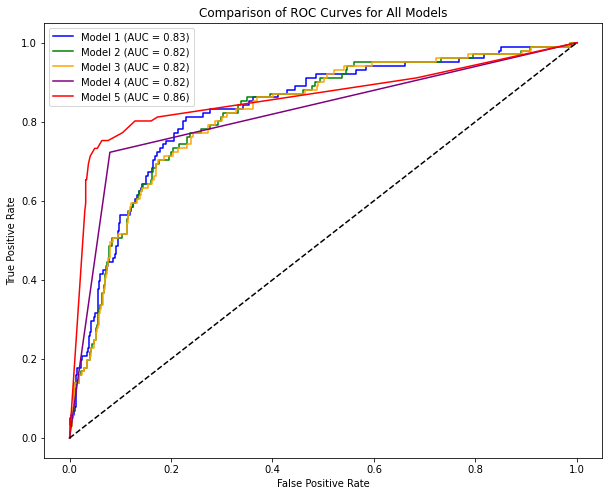

In [32]:
import matplotlib.pyplot as plt

# Assuming the fpr and tpr values are available for each model
plt.figure(figsize=(10, 8))

# Plotting each ROC curve
plt.plot(fpr, tpr, color='blue', label='Model 1 (AUC = 0.83)')
plt.plot(fpr_resampled, tpr_resampled, color='green', label='Model 2 (AUC = 0.82)')
plt.plot(fpr_tuned, tpr_tuned, color='orange', label='Model 3 (AUC = 0.82)')
plt.plot(fpr_tree, tpr_tree, color='purple', label='Model 4 (AUC = 0.82)')
plt.plot(fpr_tree_tuned, tpr_tree_tuned, color='red', label='Model 5 (AUC = 0.86)')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Setting the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves for All Models')
plt.legend()

# Display the plot
plt.show()

## Conclusion:

The analysis and modeling conducted in this project have successfully identified an optimal approach for predicting customer churn for SyriaTel. Among the models developed, the Tuned Decision Tree (Model 5) stands out as the best performer, with an accuracy of 91.75% and a balanced performance across both churn and non-churn classes. This model demonstrates a strong ability to accurately identify customers at risk of churning, while minimizing false positives and false negatives. Such predictive power is crucial for SyriaTel, as it enables the company to target at-risk customers with tailored retention strategies, thereby reducing churn rates and improving customer loyalty.

The deployment of this model can have a significant impact on SyriaTel’s customer retention strategies. By accurately identifying customers at risk of churning, SyriaTel can tailor its marketing and customer service efforts to these individuals, offering targeted incentives or personalized service improvements to retain them. This targeted approach not only helps in reducing customer turnover but also optimizes resource allocation, ensuring that efforts are focused where they are most likely to have a positive impact.

Actionable Recommendations:

* Implement Targeted Retention Campaigns: Use the model to identify customers with a high likelihood of churning and target them with personalized retention offers, such as discounts, service upgrades, or exclusive customer support options.

* Monitor and Refine the Model: Regularly monitor the model's performance over time and retrain it with new data to ensure it adapts to changing customer behavior. Consider integrating customer feedback and service interaction data to further enhance the model's predictive power.

* Explore Ensemble Methods: While the decision tree model performed well, further exploration of ensemble methods like Random Forest or Gradient Boosting could potentially yield even better results. These methods may improve recall and overall robustness, providing a more comprehensive solution to the churn prediction problem.

By implementing these recommendations, SyriaTel can significantly reduce customer churn, thereby enhancing customer loyalty and increasing long-term revenue.